## Wine data classification using kNN



In [1]:
# import required modules
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

# Import scikit-learn dataset library
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset as dataframe
wine = datasets.load_wine(as_frame=True)
#print(wine); print()
print("value counts:"); print(wine.target.value_counts()); print()

# TODO: Find out the type of wine, features ect and print info about it 
print(wine.feature_names)
print(wine.target_names)
print(wine.data[0:5])

value counts:
target
1    71
0    59
2    48
Name: count, dtype: int64

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             

In [3]:
# TODO: Find out X and y shapes
# X shape
print(wine.data.shape)
# y shape
print(wine.target.shape)

(178, 13)
(178,)


In [4]:
# TODO: Split dataset into training set and test set (70% training and 30% test)
X = wine.data
X_train, X_test, y_train, y_test = train_test_split(X, wine.target, test_size=0.3, random_state=100)
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [5]:
# scale is done after splitting data
# if scale before, scale would be affected by test data
# TODO: Scale input set using snv
scaler = preprocessing.StandardScaler()
use_scaler = True
if use_scaler:
    # teach scaler transformer based on train data and scale training data
    X_train = scaler.fit_transform(X_train)
    # also scale testing data using alrdy taught transformer
    X_test = scaler.transform(X_test)


## Test kNN with k=5 

In [6]:
# TODO: Use kNN algorithm with k = 5 to predict the wine class
knn = KNeighborsClassifier(n_neighbors=5)
# teach k nearest model with training data
knn.fit(X_train, y_train)
# make predictions of testing data
y_pred = knn.predict(X_test)


In [7]:
# TODO: Find out the accuracy score
# Model Accuracy, how often is the classifier correct?
# compare if predictions were correct compared to real test data y values
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Accuracy: 0.9444444444444444


In [8]:
# TODO: print confusion matrix about the prediction
confusion_matrix = metrics.confusion_matrix(y_test, y_pred=y_pred)
print(confusion_matrix)


[[14  0  0]
 [ 1 16  2]
 [ 0  0 21]]


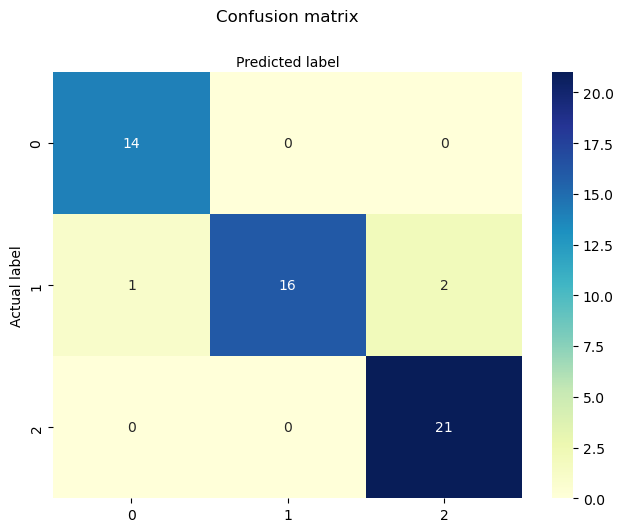

In [9]:
# TODO: create heatmap from confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# kuvassa x-axis: Predicted, y-axis: oikeat arvot
# vasemmalla yläkulmassa: malli ennusti 14 kertaa oikein että viini on luokkaa 0
# keskellä keskellä: malli ennusti 16 kertaa oikein että viini on luokkaa 1
# oikealla alakulmassa: malli ennusti 21 kertaa oikein että viini on luokkaa 2
# vasemmalla keskellä: malli kerran ennusti luokkaa 0, mutta oli oikeasti 1
# oikealla keskellä: malli kerran ennusti luokkaa 2, mutta oli oikeasti luokkaa 1

## Improving kNN Performances in scikit-learn Using GridSearchCV

When you use few neighbors, you have a prediction that will be much more variable than when you use more neighbors:

- If you use one neighbor only, the prediction can strongly change from one point to the other. When you think about your own neighbors, one may be quite different from the others. If you lived next to an outlier, your 1-NN prediction would be wrong.
- If you have multiple data points, the impact of one extremely different neighbor will be much less.
- If you use too many neighbors, the prediction of each point risks being very close. Let’s say that you use all neighbors for a prediction. In that case, every prediction would be the same.

To find the best value for k, you’re going to use a tool called GridSearchCV. This is a tool that is often used for tuning hyperparameters of machine learning models. In your case, it will help by automatically finding the best value of k for your dataset.

In [10]:
# TODO: Find out best features using GridSearchCV
parameters = {
    # eri määrä k-arvoja
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25],
    # onko eri etäisyyksillä olevat samanarvoisia vai ei
    "weights": ["uniform", "distance"],
    # onko etäisyys linnuntie vai manhattan
    "metric": ["euclidean", "manhattan"],
}

# cv defines cross validation splitting strategy
# perustuu k-fold cross validation
gs = GridSearchCV(KNeighborsClassifier(), parameters, cv=27)
gs.fit(X_train, y_train)


GridSearchCV(cv=27, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23, 25],
                         'weights': ['uniform', 'distance']})

In [11]:
# TODO: Find out best params 
print(f"Best score: {gs.best_score_}")
print(f"Best estimator: {gs.best_estimator_}")
print(f"Best params: {gs.best_params_}")

Best score: 0.9851851851851853
Best estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=9, weights='distance')
Best params: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}


In [12]:
# TODO: Try with the best values
# Create the best KNN Classifier
knn_best = KNeighborsClassifier(n_neighbors=9, metric="euclidean", weights="distance")

# Train the model using the training sets
knn_best.fit(X_train, y_train)

# Predict the response for test dataset
y_pred2 = knn_best.predict(X_test)
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred2)}")

Accuracy: 0.9444444444444444


[[14  0  0]
 [ 2 16  1]
 [ 0  0 21]]


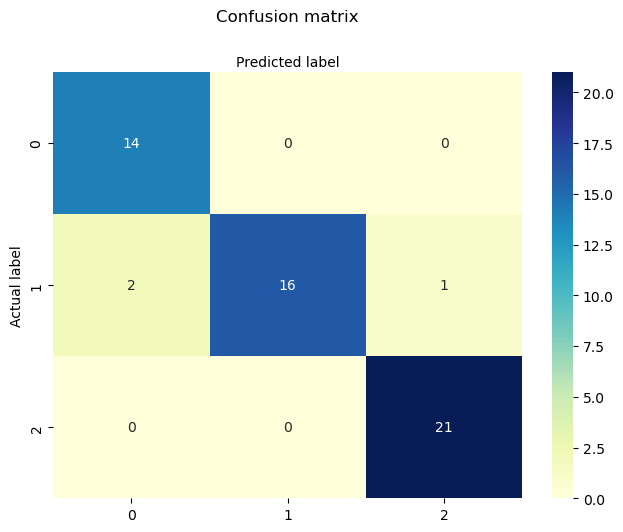

In [13]:
# TODO: print confusion matrix about the prediction
confusion_matrix2 = metrics.confusion_matrix(y_test, y_pred=y_pred2)
print(confusion_matrix2)

# TODO: create heatmap from confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(confusion_matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [14]:
# TODO: Model Accuracy, how often is the classifier correct?
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred2)}")

Accuracy: 0.9444444444444444
